## Homework Lab2

In [13]:
import pandas as pd

In [14]:
df = pd.read_csv('D:/Pum_Program/HDS_WORK/Year 3/Semester 1/Text analytics/Lecture1_Lab2/un-general-debates-blueprint.csv.gz')

In [15]:
df.columns

Index(['session', 'year', 'country', 'country_name', 'speaker', 'position',
       'text'],
      dtype='object')

In [16]:
df.head()

,session,year,country,country_name,speaker,position,text
0,25,1970,ALB,Albania,Mr. NAS,NaN,33: May I first convey to our President the co...
1,25,1970,ARG,Argentina,Mr. DE PABLO PARDO,NaN,177.\t : It is a fortunate coincidence that pr...
2,25,1970,AUS,Australia,Mr. McMAHON,NaN,100.\t It is a pleasure for me to extend to y...
3,25,1970,AUT,Austria,Mr. KIRCHSCHLAEGER,NaN,155.\t May I begin by expressing to Ambassado...
4,25,1970,BEL,Belgium,Mr. HARMEL,NaN,"176. No doubt each of us, before coming up to ..."


In [17]:
df.tail()

,session,year,country,country_name,speaker,position,text
7502,70,2015,YEM,Yemen,Mr. Abdrabuh Mansour Hadi Mansour,President,On behalf of the people and the Government of ...
7503,70,2015,YUG,Yugoslavia,Mr. Tomislav Nikolić,President,\nSeventy years have passed since the establis...
7504,70,2015,ZAF,South Africa,Jacob Zuma,President,I should like to congratulate the President an...
7505,70,2015,ZMB,Zambia,Mr. Edgar Chagwa Lungu,President,I would like to begin by thanking the Secretar...
7506,70,2015,ZWE,Zimbabwe,Robert Mugabe,President,Allow me at the outset to extend to Mr. Mogens...


## 1. Find the top 10 word bigram from UN General Debates of years 1970 - 1990 and compare with those of years 1990 - the latest 

## Processing a pipeline

In [18]:
import regex as re

def tokenize(text): ## tokennize
    return re.findall(r'[\w-]*\p{L}[\w-]*', text)

In [19]:
import nltk

stopwords = set(nltk.corpus.stopwords.words('english'))

In [20]:
def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]

In [21]:
pipeline = [str.lower, tokenize, remove_stop]

def prepare(text, pipeline):
    tokens = text
    for transform in pipeline:
        tokens = transform(tokens)
    return tokens

## N-gram with stopword (default n=2 : bigram)

In [22]:
def ngrams(tokens, n=2, sep=' ', stopwords=set()):
    return [sep.join(ngram) for ngram in zip(*[tokens[i:] for i in range(n)])
           if len([t for t in ngram if t in stopwords])==0]

In [23]:
df["tokens"] = df['text'].apply(prepare,pipeline=pipeline) #tokenize text

In [24]:
bigram = df["tokens"].apply(ngrams,stopwords=stopwords) #bigram

In [25]:
bigram

0       [may first, first convey, convey president, pr...
1       [fortunate coincidence, coincidence precisely,...
2       [pleasure extend, extend mr, mr president, pre...
3       [may begin, begin expressing, expressing ambas...
4       [doubt us, us coming, coming rostrum, rostrum ...
                              ...                        
7502    [behalf people, people government, government ...
7503    [seventy years, years passed, passed since, si...
7504    [like congratulate, congratulate president, pr...
7505    [would like, like begin, begin thanking, thank...
7506    [allow outset, outset extend, extend mr, mr mo...
Name: tokens, Length: 7507, dtype: object

## Counter

In [26]:
from collections import Counter

In [27]:
def count_words(df, column='tokens', preprocess=None, min_freq = 2):
    
    # process tokens and update counter
    def update(doc):
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(tokens)
    
    # create counter and run through all data
    counter = Counter()
    df[column].map(update)
    
    # transform counter into a DataFrame
    freq_df = pd.DataFrame.from_dict(counter, orient='index', columns=['freq'])
    freq_df = freq_df.query('freq > @min_freq')
    freq_df.index.name = 'token'
    
    return freq_df.sort_values('freq', ascending=False)

## Preparing data

In [28]:
df["tokens"] = df["text"].apply(prepare,pipeline=pipeline) #transfrom text to token and then add column tokens in dataframe

In [29]:
df.columns

Index(['session', 'year', 'country', 'country_name', 'speaker', 'position',
       'text', 'tokens'],
      dtype='object')

In [30]:
seq1_year = df["year"].isin([year for year in range(1970, 1990 + 1)]) #years 1970 - 1990
seq2_year = df["year"].isin([year for year in range(1990, 2015 + 1)]) #years 1990 - 2015

In [31]:
data_1970_1990 = df[seq1_year]["text"] #data years 1970-1990
data_1990_2015 = df[seq2_year]["text"] #data years 1990-2015

In [32]:
tokens_1970_1990 = data_1970_1990.apply(prepare,pipeline=pipeline) #apply pipeline for tokenization data years 1970-1990

In [33]:
tokens_1990_2015 = data_1990_2015.apply(prepare,pipeline=pipeline) #apply pipeline for tokenization data years 1990-2015

In [34]:
bigram_1970_1990 = tokens_1970_1990.apply(ngrams,stopwords=stopwords) #apply to bigram years 1970-1990

In [35]:
bigram_1970_1990

0       [may first, first convey, convey president, pr...
1       [fortunate coincidence, coincidence precisely,...
2       [pleasure extend, extend mr, mr president, pre...
3       [may begin, begin expressing, expressing ambas...
4       [doubt us, us coming, coming rostrum, rostrum ...
                              ...                        
2881    [mr president, president gives, gives great, g...
2882    [gives great, great pleasure, pleasure extend,...
2883    [gives distinct, distinct pleasure, pleasure s...
2884    [join speakers, speakers preceded, preceded co...
2885    [allow sir, sir first, first extend, extend wa...
Name: text, Length: 2886, dtype: object

In [36]:
bi1970_1990 = bigram_1970_1990.explode().values

In [37]:
bigram_1990_2015 = tokens_1990_2015.apply(ngrams,stopwords=stopwords) #apply to bigram years 1990-2015

In [38]:
bigram_1990_2015

2730    [allow first, first sir, sir congratulate, con...
2731    [first would, would like, like congratulate, c...
2732    [special pleasure, pleasure speak, speak sessi...
2733    [mr president, president behalf, behalf delega...
2734    [outset let, let convey, convey sir, sir warm,...
                              ...                        
7502    [behalf people, people government, government ...
7503    [seventy years, years passed, passed since, si...
7504    [like congratulate, congratulate president, pr...
7505    [would like, like begin, begin thanking, thank...
7506    [allow outset, outset extend, extend mr, mr mo...
Name: text, Length: 4777, dtype: object

In [39]:
bi1990_2015 = bigram_1990_2015.explode().values

### Answer UN general debates of years 1970 - 1990 

In [40]:
count_bi_1970_1990 = Counter(bi1970_1990)
count_bi_1970_1990.most_common(10)

[('united nations', 43846),
 ('general assembly', 13915),
 ('developing countries', 11991),
 ('international community', 11506),
 ('south africa', 9300),
 ('united states', 7718),
 ('middle east', 7608),
 ('security council', 7500),
 ('peace security', 6755),
 ('human rights', 6569)]

In [41]:
bi_report_1970_1990 = pd.DataFrame.from_dict(count_bi_1970_1990, orient="index", columns=["freq"])

### Answer UN general debates of years 1990 - 2015 (latest)

In [42]:
count_bi_1990_2015 = Counter(bi1990_2015)
count_bi_1990_2015.most_common(10)

[('united nations', 61529),
 ('international community', 16924),
 ('security council', 14040),
 ('general assembly', 13694),
 ('human rights', 13658),
 ('peace security', 8704),
 ('developing countries', 7027),
 ('member states', 6037),
 ('sustainable development', 5281),
 ('climate change', 5159)]

In [43]:
bi_report_1990_2015 = pd.DataFrame.from_dict(count_bi_1990_2015, orient="index", columns=["freq"])

## compare 1970 - 1990 and 1990 - 2015(latest)

In [44]:
bi_report_1970_1990.sort_values("freq",ascending=False).head(10) # years 1970 - 1990

,freq
united nations,43846
general assembly,13915
developing countries,11991
international community,11506
south africa,9300
united states,7718
middle east,7608
security council,7500
peace security,6755
human rights,6569


In [45]:
bi_report_1990_2015.sort_values("freq",ascending=False).head(10) # years 1990 - 2015(latest)

,freq
united nations,61529
international community,16924
security council,14040
general assembly,13694
human rights,13658
peace security,8704
developing countries,7027
member states,6037
sustainable development,5281
climate change,5159


## 2. Create a bigram word cloud of th UN General Debates dataset of years 1970 - 1990 and 1990 to the latest

In [46]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [47]:
wc = WordCloud(width = 800, height = 400,
              background_color = "black", colormap="Paired",
              max_font_size = 150, max_words = 200)

### word cloud of years 1970 - 1990

(-0.5, 799.5, 399.5, -0.5)

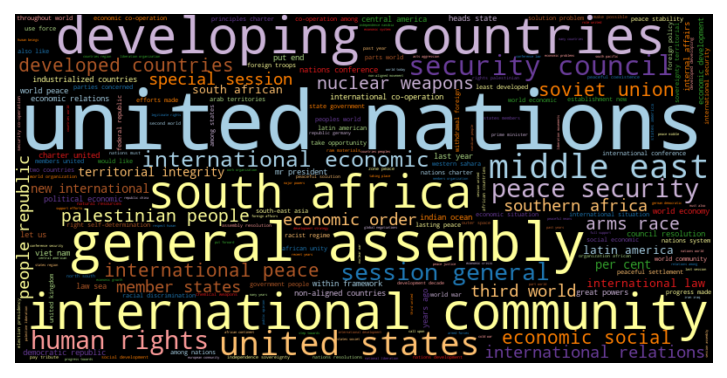

In [48]:
wc.generate_from_frequencies(count_bi_1970_1990) #data counting years 1970 - 1990 from 1.
plt.figure(dpi=150)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')

In [49]:
count_bi_1970_1990.most_common(10)

[('united nations', 43846),
 ('general assembly', 13915),
 ('developing countries', 11991),
 ('international community', 11506),
 ('south africa', 9300),
 ('united states', 7718),
 ('middle east', 7608),
 ('security council', 7500),
 ('peace security', 6755),
 ('human rights', 6569)]

### word cloud of years 1990 - 2015

(-0.5, 799.5, 399.5, -0.5)

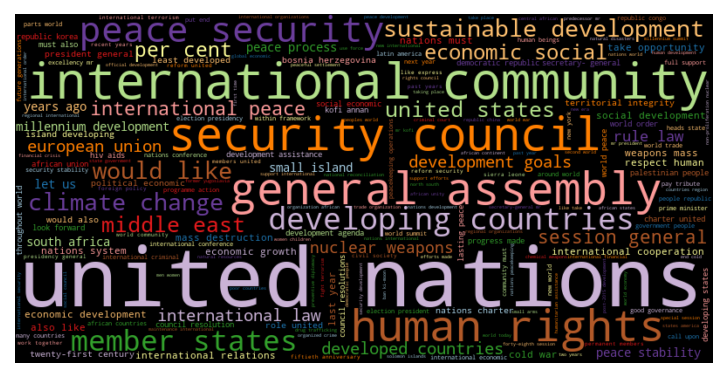

In [50]:
wc.generate_from_frequencies(count_bi_1990_2015) #data counting years 1990 - 2015 from 1.
plt.figure(dpi=150)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')

In [51]:
count_bi_1990_2015.most_common(10)

[('united nations', 61529),
 ('international community', 16924),
 ('security council', 14040),
 ('general assembly', 13694),
 ('human rights', 13658),
 ('peace security', 8704),
 ('developing countries', 7027),
 ('member states', 6037),
 ('sustainable development', 5281),
 ('climate change', 5159)]

## 3. Create a trend graph showing the bigram and word trend of "climate change","global warming", "wars" and 3 others of your choices

In [52]:
def count_keywords(tokens, keywords):
    tokens = [t for t in tokens if t in keywords]
    counter = Counter(tokens)
    return [counter.get(k, 0) for k in keywords]

In [53]:
def count_keywords_by(df, by, keywords, column='tokens'):
    freq_matrix = df[column].apply(count_keywords, keywords=keywords)
    freq_df = pd.DataFrame.from_records(freq_matrix, columns=keywords)
    freq_df[by] = df[by]
    
    return freq_df.groupby(by).sum().sort_values(by)

## preparing data

In [54]:
word_trends = ['climate change','global warming','wars','human rights','economic social','struggle']

In [55]:
df['tokens']

0       [may, first, convey, president, congratulation...
1       [fortunate, coincidence, precisely, time, unit...
2       [pleasure, extend, mr, president, warmest, con...
3       [may, begin, expressing, ambassador, hambro, b...
4       [doubt, us, coming, rostrum, wonders, usefulne...
                              ...                        
7502    [behalf, people, government, yemen, would, lik...
7503    [seventy, years, passed, since, establishment,...
7504    [like, congratulate, president, country, denma...
7505    [would, like, begin, thanking, secretary-gener...
7506    [allow, outset, extend, mr, mogens, lykketoft,...
Name: tokens, Length: 7507, dtype: object

In [56]:
df['bigram'] = df['tokens'].apply(ngrams,stopwords=stopwords)

In [57]:
df['bigram']

0       [may first, first convey, convey president, pr...
1       [fortunate coincidence, coincidence precisely,...
2       [pleasure extend, extend mr, mr president, pre...
3       [may begin, begin expressing, expressing ambas...
4       [doubt us, us coming, coming rostrum, rostrum ...
                              ...                        
7502    [behalf people, people government, government ...
7503    [seventy years, years passed, passed since, si...
7504    [like congratulate, congratulate president, pr...
7505    [would like, like begin, begin thanking, thank...
7506    [allow outset, outset extend, extend mr, mr mo...
Name: bigram, Length: 7507, dtype: object

In [58]:
df['word_trend'] = df['tokens'] + df['bigram']

In [59]:
df_word_trend_freq = count_keywords_by(df, by='year', keywords=word_trends, column='word_trend')

In [60]:
df_word_trend_freq.head()

,climate change,global warming,wars,human rights,economic social,struggle
year,,,,,,
1970,0,0,38,143,135,165
1971,0,0,85,119,187,239
1972,0,0,88,124,165,302
1973,0,0,72,200,226,331
1974,0,0,70,127,186,400


## trend graph

<AxesSubplot:xlabel='year'>

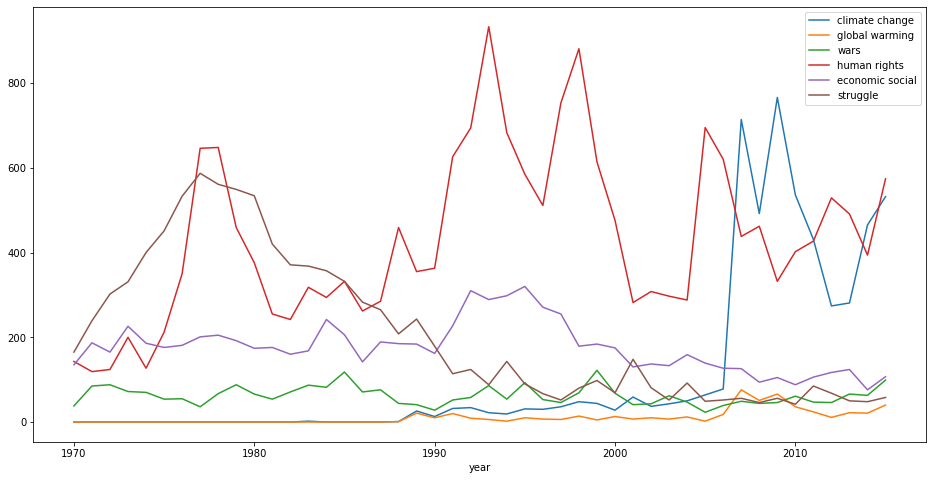

In [61]:
df_word_trend_freq.plot(kind='line',figsize=(16,8))